## **MODEL EVALUATION**

### *1.1 Loading the Model and Data*

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

# Loading the preprocessed dataset
data = pd.read_csv('/home/astrosanderson/Desktop/telecom-churn-prediction/data/processed/telecom_churn_processed.csv')  

X = data.drop('Churn', axis=1)
y = data['Churn']

# Split again with the same random_state to reproduce the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loading the saved model
model = joblib.load('/home/astrosanderson/Desktop/telecom-churn-prediction/models/logistic_regression_model.pkl')


### *1.2 Evaluate Metrics*

Accuracy: 0.8147622427253371
ROC AUC: 0.8608511805562744

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



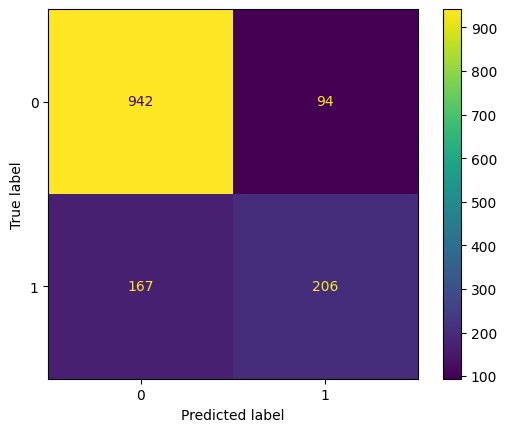

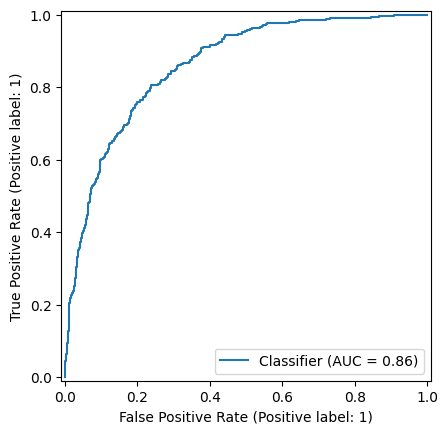

In [7]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
RocCurveDisplay.from_predictions(y_test, y_prob)

Interpret these metrics carefully:

* **Precision**: how many predicted “Yes” are truly “Yes”

* **Recall**: how many actual “Yes” did the model catch

* **F1-score**: balance between precision and recall

* **ROC AUC**: how well it separates Yes/No overall

### *1.3 ROC and Precision-Recall Curves*

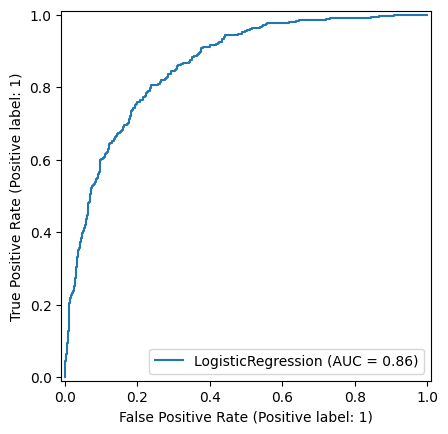

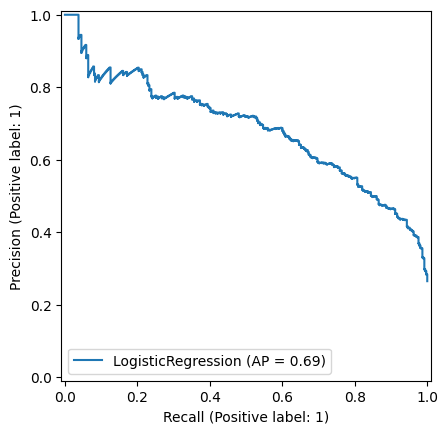

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)


### *1.4 Coefficients (Feature Importance for Logistic Regression)*

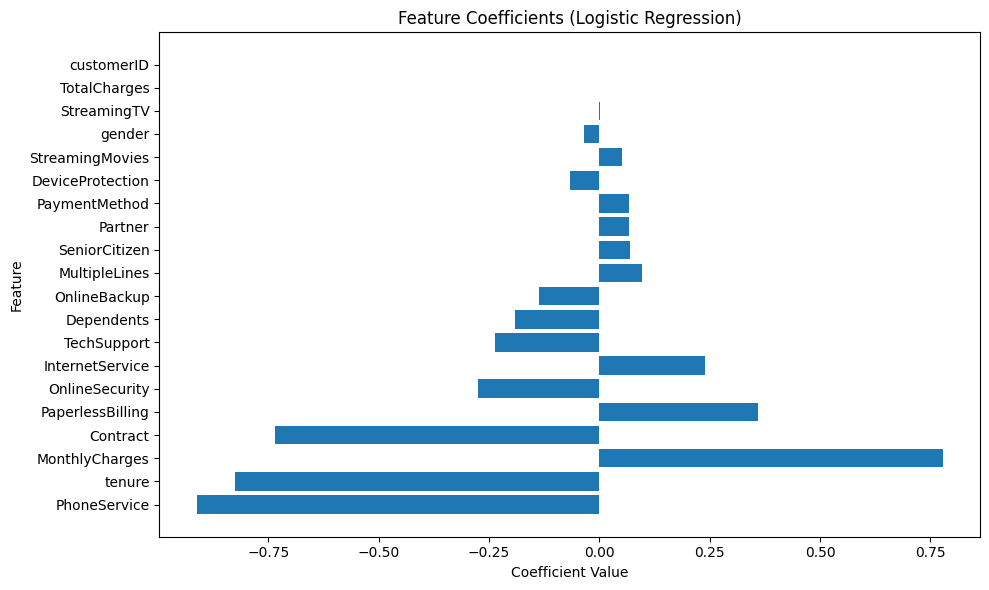

,Feature,Coefficient,Importance
6,PhoneService,-0.912593,0.912593
5,tenure,-0.826084,0.826084
18,MonthlyCharges,0.777806,0.777806
15,Contract,-0.734085,0.734085
16,PaperlessBilling,0.359432,0.359432
9,OnlineSecurity,-0.274684,0.274684
8,InternetService,0.238094,0.238094
12,TechSupport,-0.237635,0.237635
4,Dependents,-0.190303,0.190303
10,OnlineBackup,-0.137166,0.137166


In [9]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
features = X_test.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

coef_df.head(10)


Interpretation:

* Positive coefficients → increase the likelihood of the target being “Yes”.

* Negative coefficients → decrease the likelihood.

* Magnitude → strength of influence.

### *2 Handling the Class Imbalance*

In [12]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]

# # Metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("ROC AUC:", roc_auc_score(y_test, y_prob))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


### *4 Model Deployment (Streamlit App)*